#### Libraries

In [57]:
from bs4 import BeautifulSoup
from collections import Counter
import requests
import pickle
import random
import time

#### List of private companies

In [58]:
# Load list of private companies.
with open('List_private_spaceflight_company.pickle','rb') as fp:
    companylist = pickle.load(fp)
    
# Creates dictionary with private companies list. An id is assigned for each company.
lowercompanylist = []
for company in companylist:
    lowercompanylist.append(company.lower())

In [59]:
# Init counterlist
# The dictionary "counterlist" index the "weight" values for each year
counterlist = {}
for company in companylist:
    counterlist[(company)] = {'value':[]}

#### Fonctions

In [61]:
# Search fonction
def get_list_article_name(soup):
    # titlelits : List the titles of articles for one year
    titlelist = []
    dayarticle = soup.find_all('li', class_='day-article')
    for article in dayarticle:
        a = article.find_all('a')
        for articletitle in a:
            title = articletitle.get_text()
        titlelist.append(title)
    return titlelist

# Count Fonction
def get_counter(fulltitlelist, companylist, counterlist):
    # item: List the companies mentioned in all the titles on one year
    item = []
    for title in fulltitlelist:
        for company in companylist:
            if company.lower() in title.lower():
                item.append(company)

    counts = Counter(word for word in item)
    
    # Assign "weight" values (here counts) for each company
    for key in counterlist:
        if key in counts.keys():
            counterlist[(key)]['value'].append(counts[key])
        else:
            # If a company is not mentioned during a year "weight" value is 0
            counterlist[(key)]['value'].append(0)
            
    return counterlist

#### Main program

In [62]:
# For each year from 2010 to 2018
for i in range(0,9):
    # fulltitlelist : Stocks all articles on one year
    fulltitlelist = []
    # Go all the months of the year
    for j in range(1,13):
        url = 'https://www.space.com/news/archive/20' + str(10 + i) + '/' + str(j)
        r = requests.get(url)
        soup = BeautifulSoup(r.text,'html5lib')

        titlelist = get_list_article_name(soup)
        
        for title in titlelist:
            fulltitlelist.append(title)

        time.sleep(random.uniform(0.5,1.5))
        
    counterlist = get_counter(fulltitlelist, companylist, counterlist)
    print('20' + str(10 + i))

2010
2011
2012
2013
2014
2015
2016
2017
2018


#### Recording of data

In [65]:
with open('List_count_companies_2010_2018.pickle','wb+') as fp:
    pickle.dump(counterlist, fp)

#### Optimization of the list of private companies

In [66]:
with open('List_count_companies_2010_2018.pickle','rb') as fp:
    counterlist = pickle.load(fp)

In [68]:
# This code looks for companies which have a "weight" of less than 4
names = []
for key in counterlist.keys():
    i = 0
    for value in counterlist[key]['value']:
        i += value
    if i < 4:
        names.append(key)

for name in names:
    del counterlist[name]
    
counterlist

{'Ventions': {'value': [0, 2, 0, 0, 0, 1, 0, 1, 0]},
 'Blue Origin': {'value': [1, 0, 2, 1, 3, 10, 29, 27, 19]},
 'Lockheed Martin': {'value': [0, 1, 0, 1, 1, 1, 3, 3, 3]},
 'Rocket Lab': {'value': [0, 0, 1, 0, 0, 0, 6, 12, 23]},
 'SpaceX': {'value': [29, 10, 80, 59, 92, 94, 135, 199, 228]},
 'United Launch Alliance': {'value': [0, 0, 0, 0, 0, 4, 2, 0, 2]},
 'Virgin Galactic': {'value': [12, 10, 12, 30, 35, 9, 14, 12, 21]}}

#### Import data in Excel sheet

In [69]:
import pandas as pd

In [70]:
fullvalue_excel = []
for key in counterlist.keys():
    value_excel = []
    value_excel.append(key)
    for value in counterlist[key]['value']:
        value_excel.append(value)
    fullvalue_excel.append(value_excel)
df = pd.DataFrame(fullvalue_excel, columns=['Company', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
df

,Company,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Ventions,0,2,0,0,0,1,0,1,0
1,Blue Origin,1,0,2,1,3,10,29,27,19
2,Lockheed Martin,0,1,0,1,1,1,3,3,3
3,Rocket Lab,0,0,1,0,0,0,6,12,23
4,SpaceX,29,10,80,59,92,94,135,199,228
5,United Launch Alliance,0,0,0,0,0,4,2,0,2
6,Virgin Galactic,12,10,12,30,35,9,14,12,21


#### Save table

In [21]:
df.to_excel("output.xlsx")

#### Graphs

In [71]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

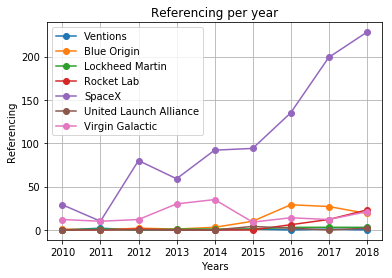

In [73]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for company in counterlist.keys():
    y = counterlist[company]['value']
    plt.plot(x, y, marker='o', label=company)
    
plt.xlabel('Years')
plt.ylabel('Referencing')
plt.title('Referencing per year')
plt.grid(True)
plt.legend()
plt.show()

In [74]:
counterlist2 = counterlist
del counterlist2['SpaceX']
counterlist2

{'Ventions': {'value': [0, 2, 0, 0, 0, 1, 0, 1, 0]},
 'Blue Origin': {'value': [1, 0, 2, 1, 3, 10, 29, 27, 19]},
 'Lockheed Martin': {'value': [0, 1, 0, 1, 1, 1, 3, 3, 3]},
 'Rocket Lab': {'value': [0, 0, 1, 0, 0, 0, 6, 12, 23]},
 'United Launch Alliance': {'value': [0, 0, 0, 0, 0, 4, 2, 0, 2]},
 'Virgin Galactic': {'value': [12, 10, 12, 30, 35, 9, 14, 12, 21]}}

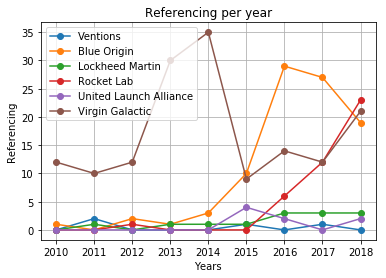

In [75]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for company in counterlist2.keys():
    y = counterlist2[company]['value']
    plt.plot(x, y, marker='o', label=company)
    
plt.xlabel('Years')
plt.ylabel('Referencing')
plt.title('Referencing per year')
plt.grid(True)
plt.legend()
plt.show()